<h1 style = 'text-align: center;' >CUMULATIVE STOCK RETURNS</h1>

<h2 style = 'text-align: center;' >May 1, 2024</h2>

**Section 1: Import neccesary libraries**

In [26]:
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os

**Section 2: Declare Date Range / Time Horizon for the Stock Returns**

In [7]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 5*365)
end_date, start_date

(datetime.datetime(2024, 5, 1, 12, 2, 2, 901279),
 datetime.datetime(2019, 5, 3, 12, 2, 2, 901279))

**Section 3: Create a list of stocks**

In [8]:
stocks_list = ['MSFT', 'NFLX', 'AAPL', 'META']

**Section 4: Fetch stock close prices from Yahoo Finance**

In [10]:
stock_price = yf.download(stocks_list, start=start_date, end=end_date)['Close']
stock_price.tail(5)

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,META,MSFT,NFLX
Date,,,,
2024-04-24,169.020004,493.500000,409.059998,555.119995
2024-04-25,169.889999,441.380005,399.040009,564.799988
2024-04-26,169.300003,443.290009,406.320007,561.229980
2024-04-29,173.500000,432.619995,402.250000,559.489990
2024-04-30,170.330002,430.170013,389.329987,550.640015


**Section 5: Calculate Daily Returns**

In [28]:
daily_return = stock_price.pct_change()
daily_return.head()

Ticker,AAPL,META,MSFT,NFLX
Date,,,,
2019-05-03,NaN,NaN,NaN,NaN
2019-05-06,-0.015443,-0.008134,-0.005818,-0.016518
2019-05-07,-0.026957,-0.021199,-0.020523,-0.021681
2019-05-08,0.000197,-0.001212,-0.000080,-0.016439
2019-05-09,-0.010744,-0.004696,-0.000080,-0.004446


**Section 6: Normalise returns by using log transformation**

In [29]:
log_returns = np.log(1 + daily_return)
log_returns.head()

Ticker,AAPL,META,MSFT,NFLX
Date,,,,
2019-05-03,NaN,NaN,NaN,NaN
2019-05-06,-0.015563,-0.008167,-0.005835,-0.016656
2019-05-07,-0.027327,-0.021427,-0.020736,-0.021920
2019-05-08,0.000197,-0.001213,-0.000080,-0.016576
2019-05-09,-0.010802,-0.004707,-0.000080,-0.004456


**Section 7: Calculate Cumulative Log Returns**

In [30]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.tail()

Ticker,AAPL,META,MSFT,NFLX
Date,,,,
2024-04-24,1.160905,0.926116,1.154825,0.365863
2024-04-25,1.166039,0.814499,1.130025,0.383150
2024-04-26,1.162560,0.818817,1.148104,0.376810
2024-04-29,1.187066,0.794453,1.138037,0.373704
2024-04-30,1.168626,0.788774,1.105390,0.357760


**Section 8: Calculate Cumulative Returns**

In [24]:
cumulative_returns = np.exp(cumulative_log_returns) - 1
cumulative_returns.tail()

Ticker,AAPL,META,MSFT,NFLX
Date,,,,
2024-04-24,2.192822,1.524684,2.173468,0.441758
2024-04-25,2.209256,1.258045,2.095733,0.466899
2024-04-26,2.198111,1.267816,2.152211,0.457627
2024-04-29,2.277450,1.213230,2.120636,0.453108
2024-04-30,2.217568,1.200696,2.020403,0.430122


<Axes: title={'center': 'Cumulative Stock Returns'}, xlabel='Date'>

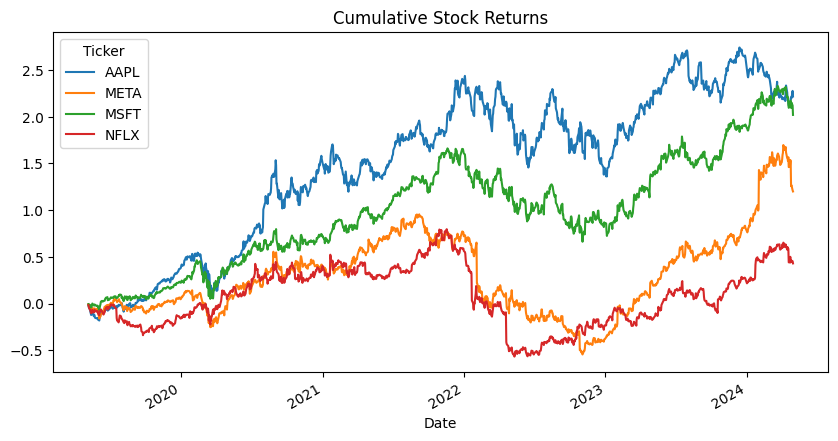

In [27]:
cumulative_returns.plot(title = 'Cumulative Stock Returns', figsize = (10, 5))